In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Оптимизация. Имплементация градиентного спуска

In [16]:
x = np.linspace(-50, 50, 5000)
def func1(_x): return _x**2
def grad1(_x): return 2*_x

In [19]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [20]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad 33.34057852091118
method1 33.35057852091836
method2 33.34057852091803


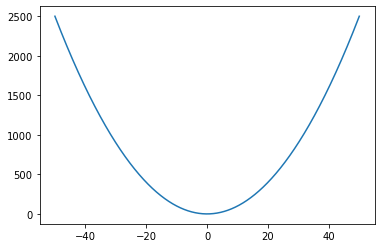

In [17]:
plt.plot(x, func1(x))
plt.show()

In [29]:
from scipy.optimize import minimize

In [28]:
x0=np.random.uniform(-50, 50)
alpha=0.12
n_iter=75
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

27.009382546122396 729.5067455227811
20.52713073505302 421.3630962139584
15.600619358640296 243.37932437318236
11.856470712566626 140.57589775795014
9.010917741550635 81.196638544992
6.848297483578483 46.89917842358738
5.2047060875196465 27.088965457464067
3.9555766265149312 15.646586448231243
3.006238236151348 9.037468332498367
2.2847410594750244 5.220041708851057
1.7364032052010185 3.0150960910323703
1.319666435952774 1.7415195021802972
1.0029464913241084 1.00590166445934
0.7622393334063224 0.5810088013917147
0.579301893388805 0.3355906836838544
0.4402694389754918 0.1938371788957943
0.33460477362137375 0.11196035453021078
0.25429962795224403 0.06466830077664973
0.19326771724370548 0.037352410528592894
0.14688346510521616 0.021574752321315255
0.11163143347996429 0.012461576940791693
0.08483988944477286 0.007197806841001281
0.06447831597802738 0.00415745323136234
0.049003520143300804 0.0024013449864348875
0.03724267530890861 0.001387016864164791
0.028304433234770544 0.00080114094074158

In [18]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 75)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

6.548202699739851e-11 4.287895859688027e-21


<b>Домашнее задание: оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>
<ul>
<li>При каких значениях alpha оптимизация проходит успешно, а при каких "застревает"?</li></ul>

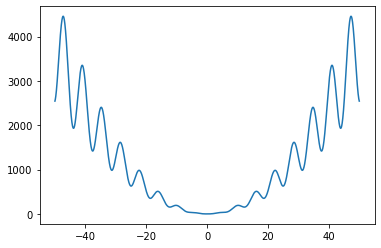

In [14]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()

## Линейная регрессия

In [11]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем матрицу X
X = np.random.uniform(-7, 7, (n_objects, n_features))

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(1, n_features ))

# сгенерируем Y с добавлением случайного шума
Y = X.dot(w_true.T) + np.random.normal(0, 0.5, size=(n_objects, 1))


In [13]:
w_0 = np.zeros(shape=(1, n_features ))

In [14]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real)**2) / y_real.shape[0]

In [15]:
mserror(X, w_true, Y), mserror(X, w_0, Y)

(0.23203268201077884, 65.08968593343052)

In [34]:
def mserror_grad(X, w, y_real):
    return 2*(X.dot(w.T)-y_real).T.dot(X)/y_real.shape[0]

In [35]:
mserror_grad(X, w_true, Y)

array([[-0.06578671, -0.13728295]])

In [36]:
mserror_grad(X, w_0, Y)

array([[-39.10094982, -51.81476092]])

In [37]:
w=w_0

# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.02

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * mserror_grad(X, w, Y)
    weight_dist = np.linalg.norm(new_w - w)
    
    w_list.append(new_w.copy().flatten())
    cur_error=mserror(X, new_w, Y)
    print('curent error: {0}'.format(cur_error))
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

curent error: 8.191718014147316
curent error: 1.208670289050625
curent error: 0.35159669765588264
curent error: 0.246396128709346
curent error: 0.23348253499858862
curent error: 0.23189724923434965
curent error: 0.23170262274228134
curent error: 0.23167872631103295
curent error: 0.2316757920158965
curent error: 0.23167543167182353
curent error: 0.23167538741530466
curent error: 0.23167538197920895
curent error: 0.23167538131140206
curent error: 0.23167538122935313
curent error: 0.23167538121927087
curent error: 0.2316753812180317
curent error: 0.23167538121787942
curent error: 0.23167538121786072
curent error: 0.2316753812178584


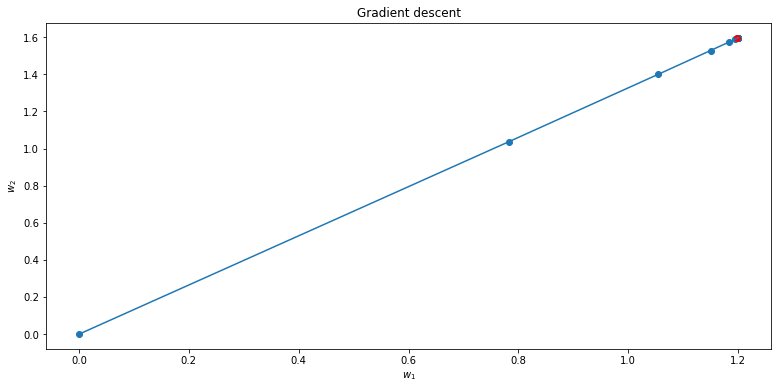

In [38]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0, 0], w_true[0, 1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

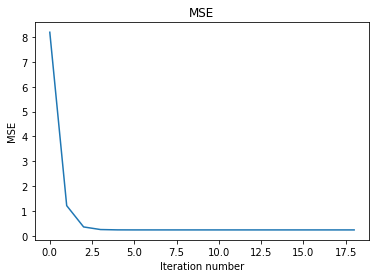

In [39]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

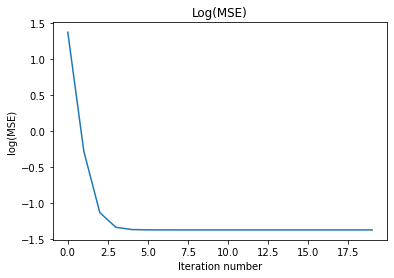

In [37]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

In [40]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y)).T

normal_eq_w = normal_equation(X, Y)
print('В случае использования нормального уравнения функционал ошибки составляет {0}'.format(
    round(mserror(X, normal_eq_w, Y), 4)))

В случае использования нормального уравнения функционал ошибки составляет 0.2317


In [42]:
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], 2*np.sum(delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [43]:
shift=np.random.uniform(0, 100)
Y_shift=Y+shift
lr=linear_regression(0.5)
lr.fit(X, Y_shift)
lr.test(X, Y_shift)

0.2316741583341709

In [44]:
shift, lr.w0

(39.73802665056761, 39.73913152860451)

In [45]:
lr.w, w_true

(array([[1.20046886, 1.59755017]]), array([[1.19846509, 1.59330286]]))